In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import json
import datetime
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [20]:
df = pd.read_pickle('../data/processed/sim_closure_100k.pickle')
df

,initial_country,idx_country,R0,Tc,Tr,omega,limit_deaths,n_closed,react_time,total_infected,total_death,total_recovered
0,LBN,106,8.490802,2.474947,21.014286,0.059029,72,6,23,5.784074e+09,3.219167e+09,2.595155e+09
1,KIR,99,2.161672,8.939155,19.323523,0.002080,872,2,2,4.535617e+09,1.748364e+08,4.350775e+09
2,MOZ,129,15.439975,1.345278,20.771054,0.036275,192,0,22,5.557288e+09,2.399471e+09,3.184538e+09
3,ERI,58,1.141326,2.156481,2.461249,0.004779,511,9,28,8.534615e+08,9.893725e+06,8.421974e+08
4,VCT,174,8.327237,1.335545,11.121400,0.048201,958,18,20,3.785881e+09,1.321729e+09,2.465612e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CZE,49,3.732819,3.093568,11.547730,0.020647,13,2,15,1.024764e+07,1.972833e+06,8.274696e+06
99996,KAZ,97,10.763182,1.582101,17.028439,0.268547,76,15,29,1.797881e+07,1.475270e+07,3.226052e+06
99997,ITA,93,9.734467,0.222185,2.162848,0.019374,434,12,21,6.043128e+07,2.430408e+06,5.800084e+07
99998,ARM,7,18.957722,0.690372,13.087873,0.068398,788,3,14,2.951763e+06,1.394205e+06,1.557459e+06


In [16]:
df.describe()

,idx_country,R0,Tc,Tr,omega,limit_deaths,n_closed,react_time,total_infected,total_death,total_recovered
count,60000.000000,60000.000000,60000.000000,60000.000000,6.000000e+04,60000.000000,60000.00000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04
mean,101.973333,11.016525,1.831601,11.998738,9.992946e-02,501.864983,10.01635,15.018283,3.651699e+07,1.442433e+07,2.209069e+07
std,59.202706,5.784485,2.276404,5.766198,9.942266e-02,288.567551,5.47471,8.386079,1.612784e+08,7.521626e+07,1.043232e+08
min,0.000000,1.000315,0.096351,2.000112,8.708836e-07,1.000000,1.00000,1.000000,1.000000e+00,0.000000e+00,0.000000e+00
25%,51.000000,5.968790,0.627237,7.018530,2.876300e-02,252.000000,5.00000,8.000000,5.156820e+05,1.171848e+05,2.618708e+05
50%,102.000000,11.065165,1.089724,12.017452,6.942858e-02,502.000000,10.00000,15.000000,5.638668e+06,1.591815e+06,3.011414e+06
75%,153.000000,16.015989,2.001040,16.959050,1.390932e-01,752.000000,15.00000,22.000000,2.237836e+07,7.236980e+06,1.195486e+07
max,204.000000,20.999684,21.300357,21.999788,1.078351e+00,999.000000,19.00000,29.000000,5.722431e+09,3.179097e+09,4.308556e+09


In [17]:
columns = df.describe().columns

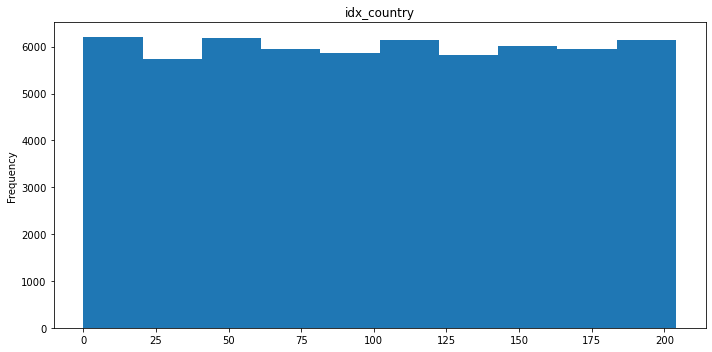

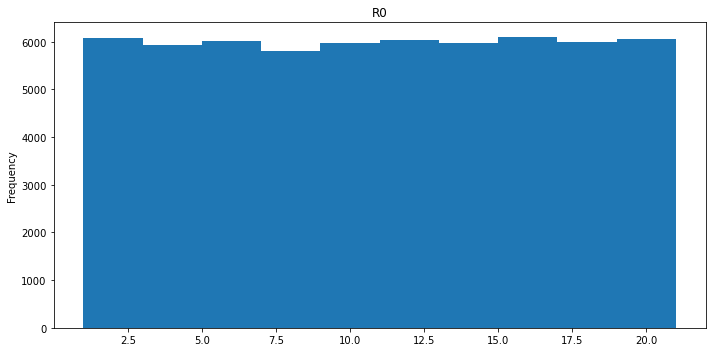

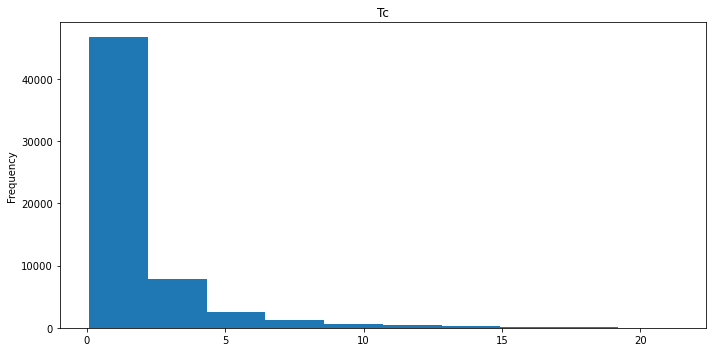

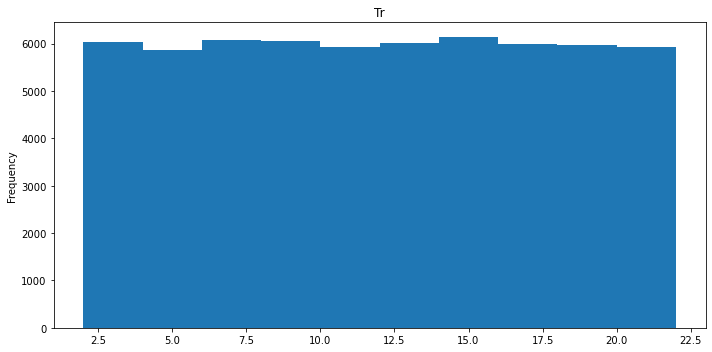

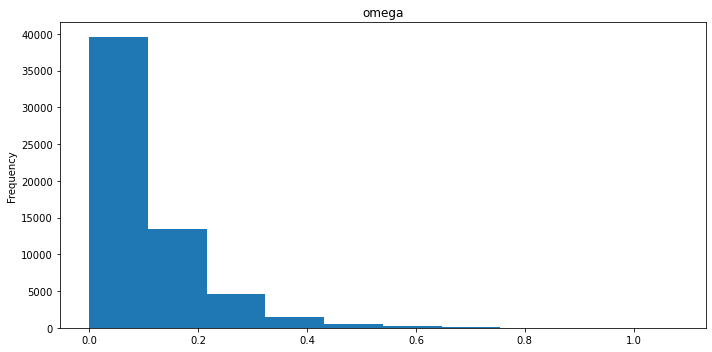

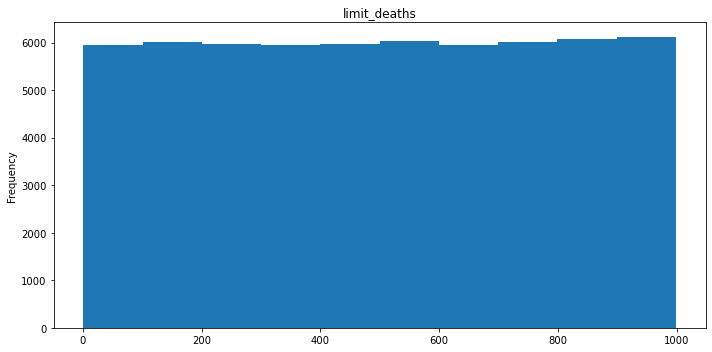

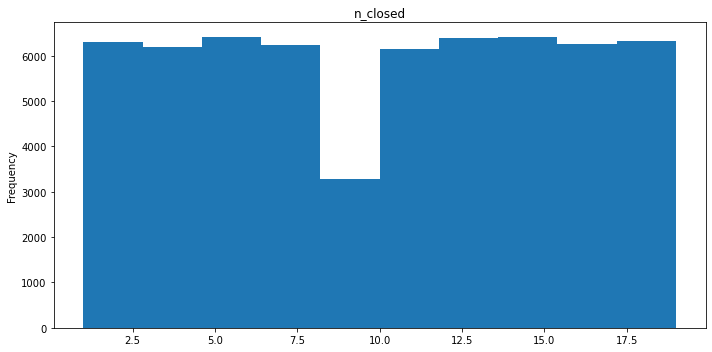

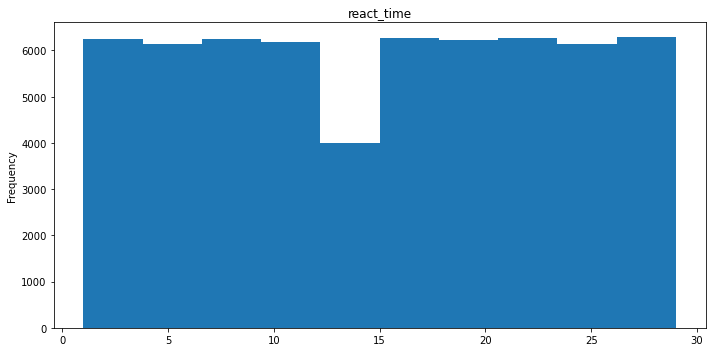

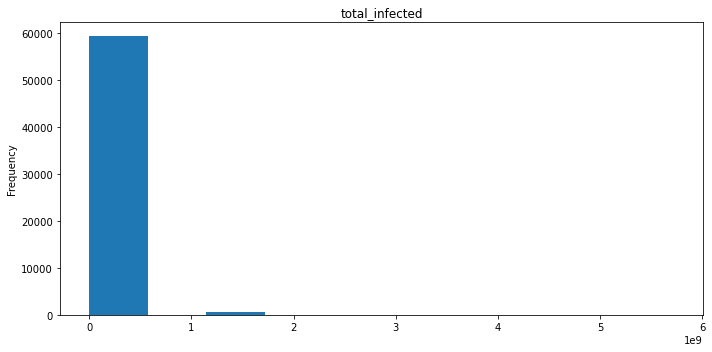

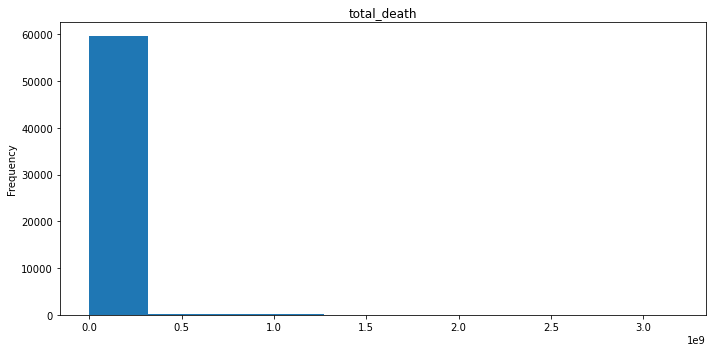

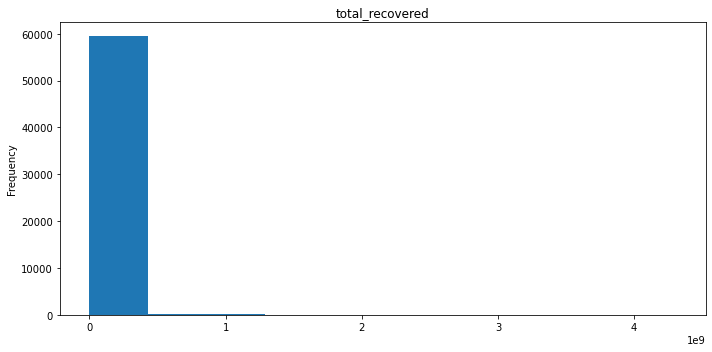

In [18]:
for c in columns:
    fig, ax = plt.subplots(1, 1, figsize = (10,5))
    df[c].plot(kind='hist', ax=ax, title=str(c))
    plt.tight_layout()

In [11]:
with open('../data/interim/alpha3_to_alpha2.txt', 'r') as file:
    alpha3_to_alpha2 = json.load(file)
    
graph = nx.read_gpickle('../data/interim/routes_countries.gpickle')

degree = dict(nx.degree_centrality(graph))
betw = nx.betweenness_centrality(graph)
closeness = nx.closeness_centrality(graph)

df['iso2'] = df['initial_country'].map(alpha3_to_alpha2)
df['betweenness'] = df['iso2'].map(betw)
df['degree'] = df['iso2'].map(degree)
df['closeness'] = df['iso2'].map(closeness)
df.head()

,initial_country,idx_country,R0,Tc,Tr,omega,limit_deaths,n_closed,react_time,total_infected,total_death,total_recovered,iso2,betweenness,degree,closeness
0,LBN,106,8.490802,2.474947,21.014286,0.016962,81,5,19,1.256265e+10,3.307321e+09,9.278445e+09,LB,0.001057,0.270270,0.460581
1,MDV,116,2.999498,3.728950,11.184978,0.123125,109,8,22,3.134984e+09,1.805847e+09,1.311287e+09,MV,0.000023,0.130631,0.436149
2,WSM,157,2.128232,7.724712,16.439975,0.020068,303,2,21,1.430980e+05,3.534100e+04,1.075320e+05,WS,0.000000,0.031532,0.399281
3,IRN,88,13.349630,1.066177,14.233063,0.048201,58,3,20,1.222295e+10,4.977499e+09,7.255263e+09,IR,0.001221,0.261261,0.460581
4,DNK,50,12.848291,0.227969,2.929008,0.059875,144,5,18,1.222223e+10,1.823815e+09,1.039968e+10,DK,0.012772,0.414414,0.523585


In [12]:
df['total_death'] = df['total_death'] / 1000

In [13]:
df.sample(10)

,initial_country,idx_country,R0,Tc,Tr,omega,limit_deaths,n_closed,react_time,total_infected,total_death,total_recovered,iso2,betweenness,degree,closeness
12690,SVK,165,15.757764,0.796581,12.552340,0.154005,349,6,7,1.207963e+10,7969870.136,4.122785e+09,SK,0.000000,0.081081,0.420455
3148,AUS,9,10.182598,1.743369,17.752023,0.006952,211,2,15,1.207840e+10,1327333.317,1.075560e+10,AU,0.061769,0.301802,0.487912
18527,MAC,112,17.227430,1.116525,19.234848,0.003023,80,5,29,1.207854e+10,663829.844,1.141839e+10,MO,0.000000,0.081081,0.378194
15265,GRL,74,12.153934,0.194800,2.367584,0.074528,149,3,18,1.207764e+10,1811480.529,1.026626e+10,GL,0.000058,0.027027,0.356340
10753,KHM,32,5.176192,1.432581,7.415317,0.211144,111,1,13,7.930834e+09,4842537.990,3.092890e+09,KH,0.000027,0.099099,0.378194
18347,LTU,110,11.651495,1.232705,14.362853,0.131067,180,3,15,1.207531e+10,7896023.358,4.194448e+09,LT,0.000126,0.234234,0.448485
270,YEM,202,18.960611,0.362311,6.869646,0.272473,60,4,22,1.208047e+10,7878840.611,4.209242e+09,YE,0.000565,0.144144,0.414953
5077,KWT,102,10.360014,1.437364,14.891112,0.004679,192,9,28,1.207847e+10,786779.129,1.129275e+10,KW,0.001572,0.234234,0.484716
17392,GUM,76,3.868790,0.596647,2.308303,0.194585,128,8,20,1.187607e+10,3680955.394,8.195197e+09,GU,0.005802,0.090090,0.416510
19852,PYF,66,19.926181,0.496015,9.883682,0.031439,74,3,14,1.207849e+10,2864433.870,9.218294e+09,PF,0.000428,0.054054,0.400722


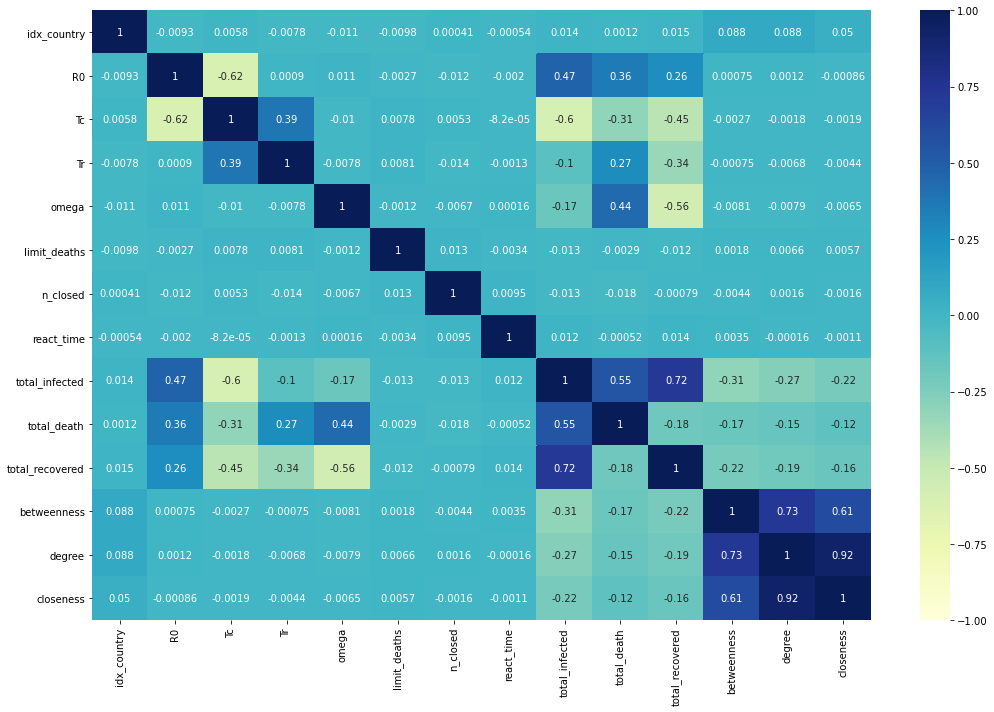

In [14]:
corr_matrix = df.corr()
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.heatmap(corr_matrix, vmax=1, vmin=-1, annot=True, cmap="YlGnBu", ax=ax)
plt.tight_layout()